## Exercise 1: Text Preprocessing and Word Frequency Analysis

### Purpose
In this exercise, you will learn how to:
1. Preprocess text from a selected book by removing common words (stopwords).
2. Visualize the frequency of words in the text through a bar chart.
3. Find the most common words in a book, helping you understand its key topics and themes.

#### Instructions

1. Select a Book:
   - You will choose a book from a list of books that we've already preprocessed. Each book has been cleaned and stored in text files.
   - The metadata of the books (such as title, author, etc.) is stored in a CSV file that you can refer to for easier selection.

2. Preprocess the Text:
   - Once you choose a book, we will preprocess the text. This involves cleaning the text by:
     - Removing unnecessary words (known as stopwords), which are common words like "the", "and", "to", "of", etc.
     - Converting the text to lowercase to avoid treating "Book" and "book" as different words.
     - Lemmatizing the words, which means reducing words to their base form (e.g., "running" becomes "run").

3. Word Frequency Analysis:
   - After preprocessing, you will analyze the text to determine which words appear most frequently.
   - You will use a bar chart to visualize the top 10 most common words in the text.

4. Result:
   - The bar chart will show you the 10 most frequent words, which can give you an insight into the main themes or topics of the book.

#### Steps to Complete the Exercise:

1. Load the Metadata File:
   - First, you'll look at the CSV file that contains information about the books (title, author, etc.).
   - Select a book from the list by looking at the titles.

2. Preprocess the Selected Book:
   - Once you select a book, load the corresponding text file and preprocess the text. This will remove stopwords and clean the data.
   
3. Visualize Word Frequencies:
   - After preprocessing, generate a bar chart that displays the 10 most common words in the book's text.
   - The bar chart will help you quickly see which words are used the most.

4. Interpret Results:
   - Analyze the words displayed on the bar chart and try to make inferences about the book's themes. For example, if the word "love" appears frequently, it could suggest that the book is about romance.

#### Expected Output:
By the end of the exercise, you should have:
1. A bar chart showing the top 10 most frequent words in your selected book.


#### **Additional Tips:**
- Make sure you clean the text properly to get the most meaningful words.
- Pay attention to the stopwords list. If you feel a word is too common and not meaningful, consider adding it to your stopwords list.


In [1]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re

In [2]:
# Directories
metadata_csv = "C:/Users/re99n/BANNED_BOOKS_PROJECT/BannedBooks_metadata.csv"
processed_text_dir = "C:/Users/re99n/OneDrive/Desktop/CollectingData/final_txt"


Enter part of the book title or author name:  finn


Automatically selected: 'Adventures of Huckleberry Finn' by Mark Twain


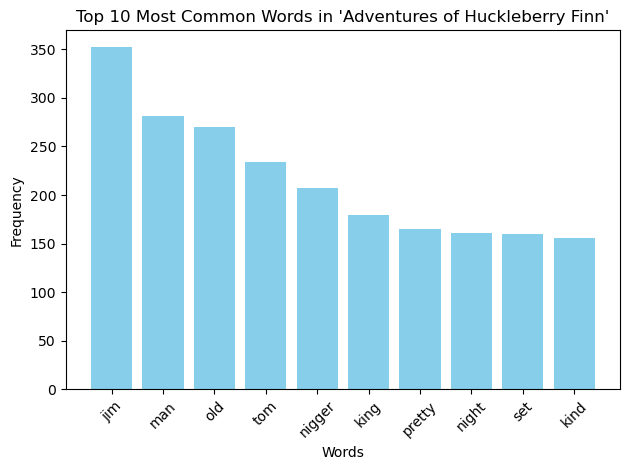

In [4]:
#Define function for stopwords 
def load_stopwords(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        stopwords = {line.strip().lower() for line in file}
    return stopwords

# Load stopwords from the file
stopwords_file_path = "C:/Users/re99n/OneDrive/Desktop/CollectingData/group_project/stopwords/stopwords.txt" 
stop_words = load_stopwords(stopwords_file_path)


# Function to clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    return [word for word in words if word not in stop_words and word.isalpha()]

# Function to plot word frequency
def plot_word_frequency(word_counts, title):
    words, counts = zip(*word_counts)
    plt.bar(words, counts, color="skyblue")
    plt.title(f"Top 10 Most Common Words in '{title}'")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Main script
if __name__ == "__main__":
    # Load metadata
    metadata = pd.read_csv(metadata_csv)

    while True:
        # Ask the user to search for a book
        search_query = input("\nEnter part of the book title or author name: ").strip().lower()
        matching_books = metadata[
            metadata["Title"].str.lower().str.contains(search_query) |
            metadata["Author"].str.lower().str.contains(search_query)
        ]

        if matching_books.empty:
            print("No matches found. Please try again.")
        else:
            selected_row = matching_books.iloc[0]  # Automatically select the first match
            selected_title = selected_row['Title']
            selected_file = selected_row['FileName']
            print(f"Automatically selected: '{selected_title}' by {selected_row['Author']}")
            break

    # Load the processed text
    text_file_path = os.path.join(processed_text_dir, selected_file)
    with open(text_file_path, "r", encoding="utf-8") as file:
        text = file.read()
    
    # Preprocess text and calculate word frequencies
    words = preprocess_text(text)
    word_counts = Counter(words).most_common(10)
    
    # Plot the word frequencies
    plot_word_frequency(word_counts, selected_title)

## Exercise 2 : Sentiment Analysis, WordCloud and Bigram Analysis

For this section we will further our analysis focusing on text preprocessing and word frequency analysis:

1. Create a word cloud visualisation with the most frequent words, which would provide an overview of the texts' themes.
2. Analyse the most common two pairs of words -bigram analysis-. This would provide more context of how authors use specific words in the studied text.
3. Perform a basic sentiment analysis on the preprocess text. This would give an idea of the overall emotional tone of the selected texts.


### Steps Needed

    1. Word Cloud:
        - To generate such the library "wordcloud" would be used.
        - Customization of the appearance of the word cloud can be adjusted to make it more visually appealing.
    2. Bigram Analysis:
        -To generate such analysis the library "nltk" would be used.
        -Create a bar chart for the top 5 most frequent bigrams. (The number could be customized for further understandment of the texts)
    3. Basic Sentiment Analysis:
        -To generate such analysis the library "textblob" would be used.


In [5]:
#import the NLTK punkt tokenizer:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\re99n\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True


Enter part of the book title or author name:  finn


Automatically selected: 'Adventures of Huckleberry Finn' by Mark Twain


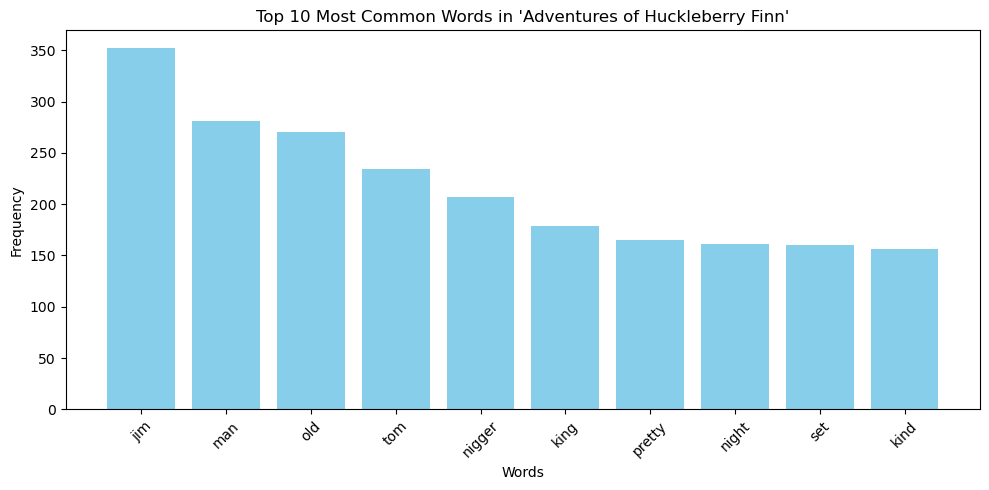

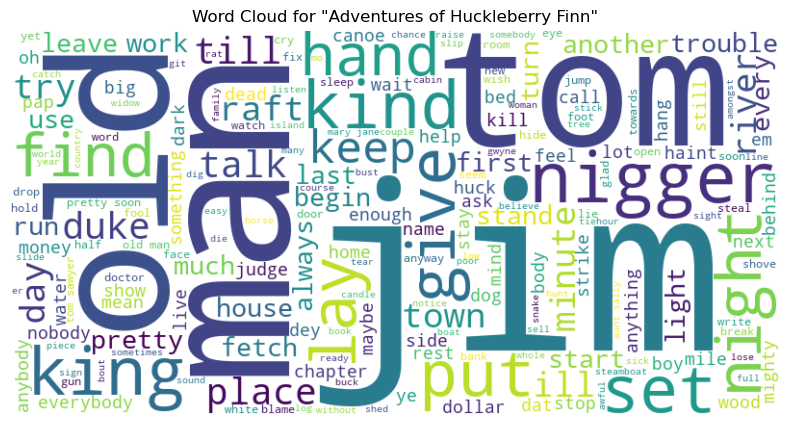

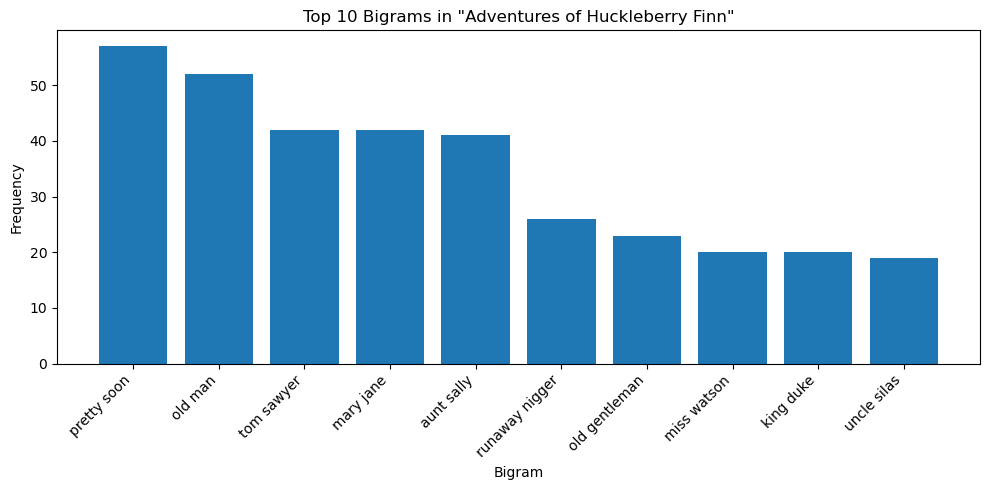


Sentiment Analysis for 'Adventures of Huckleberry Finn':
Polarity: 0.08
Interpretation: Positive


In [2]:
import os
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
from nltk import bigrams
from textblob import TextBlob

# Directories
metadata_csv = "C:/Users/re99n/BANNED_BOOKS_PROJECT/BannedBooks_metadata.csv"
processed_text_dir = "C:/Users/re99n/OneDrive/Desktop/CollectingData/final_txt"

# Define function for stopwords 
def load_stopwords(file_path):
    with open(file_path, "r", encoding="utf-8") as file:
        stopwords = {line.strip().lower() for line in file}
    return stopwords

# Load stopwords from the file
stopwords_file_path = "C:/Users/re99n/OneDrive/Desktop/CollectingData/group_project/stopwords/stopwords.txt" 
stop_words = load_stopwords(stopwords_file_path)

# Function to clean and preprocess text
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    words = text.split()  # Split into words
    return [word for word in words if word not in stop_words and word.isalpha()]


# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for "{title}"')
    plt.show()

# Function to perform bigram analysis
def analyze_bigrams(words, title):
    bigram_counts = Counter(bigrams(words))
    top_bigrams = bigram_counts.most_common(10)
    
    plt.figure(figsize=(10, 5))
    plt.bar(*zip(*[(f"{w1} {w2}", count) for (w1, w2), count in top_bigrams]))
    plt.title(f'Top 10 Bigrams in "{title}"')
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Function to perform sentiment analysis
def analyze_sentiment(text, title):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    
    print(f"\nSentiment Analysis for '{title}':")
    print(f"Polarity: {sentiment:.2f}")
    print("Interpretation: ", end="")
    if sentiment > 0:
        print("Positive")
    elif sentiment < 0:
        print("Negative")
    else:
        print("Neutral")

# Main script
if __name__ == "__main__":
    # Load metadata
    metadata = pd.read_csv(metadata_csv)
    
    while True:
        # Ask the user to search for a book
        search_query = input("\nEnter part of the book title or author name: ").strip().lower()
        matching_books = metadata[
            metadata["Title"].str.lower().str.contains(search_query) |
            metadata["Author"].str.lower().str.contains(search_query)
        ]

        if matching_books.empty:
            print("No matches found. Please try again.")
        else:
            selected_row = matching_books.iloc[0]  # Automatically select the first match
            selected_title = selected_row['Title']
            selected_file = selected_row['FileName']
            print(f"Automatically selected: '{selected_title}' by {selected_row['Author']}")
            break

    # Load the processed text
    text_file_path = os.path.join(processed_text_dir, selected_file)
    with open(text_file_path, "r", encoding="utf-8") as file:
        text = file.read()
    
    # Preprocess text and calculate word frequencies
    words = preprocess_text(text)
    word_counts = Counter(words).most_common(10)
    
    
    # Generate word cloud
    generate_word_cloud(" ".join(words), selected_title)
    
    # Perform bigram analysis
    analyze_bigrams(words, selected_title)
    
    # Perform sentiment analysis
    analyze_sentiment(text, selected_title)
